In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import torch
from torch import nn

In [ ]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from IPython.display import Markdown, display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import json

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import random
# Set seed for reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ***Предобработка данных***

In [ ]:
train_df = pd.read_csv("loan_train.csv")
test_df = pd.read_csv("loan_test.csv")

In [ ]:
train_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,42788,21,102000,MORTGAGE,5.0,EDUCATION,A,10000,7.51,0.10,N,4,0
1,11553,23,49000,RENT,1.0,HOMEIMPROVEMENT,D,5000,13.17,0.10,Y,4,1
2,27481,23,30000,RENT,1.0,MEDICAL,B,10000,11.99,0.33,N,4,1
3,39841,32,95000,MORTGAGE,9.0,HOMEIMPROVEMENT,C,15000,12.84,0.16,Y,5,0
4,55662,31,32000,MORTGAGE,3.0,HOMEIMPROVEMENT,A,1200,7.68,0.04,N,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52775,44397,21,24000,MORTGAGE,5.0,EDUCATION,C,5000,14.72,0.21,Y,2,0
52776,38830,31,42500,RENT,15.0,EDUCATION,D,8000,16.29,0.19,N,6,0
52777,8888,31,65000,MORTGAGE,2.0,MEDICAL,B,10000,11.36,0.15,N,9,0
52778,54977,49,120000,RENT,11.0,EDUCATION,B,12000,12.69,0.10,N,15,0


In [ ]:
test_df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,35352,39,60000,MORTGAGE,5.0,EDUCATION,A,12000,7.88,0.20,N,12,0
1,5114,25,65000,MORTGAGE,9.0,EDUCATION,B,7000,12.42,0.11,N,4,0
2,33050,22,72000,MORTGAGE,6.0,PERSONAL,D,2000,14.84,0.03,N,2,0
3,14668,23,24000,RENT,3.0,DEBTCONSOLIDATION,B,8000,10.99,0.33,N,2,1
4,298,31,56000,RENT,1.0,MEDICAL,B,2500,11.49,0.04,N,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,43744,21,30000,OWN,1.0,PERSONAL,A,4200,5.99,0.14,N,2,0
5861,57928,29,33000,RENT,5.0,EDUCATION,C,5000,14.22,0.15,Y,5,0
5862,27450,41,39000,RENT,3.0,MEDICAL,D,5000,14.96,0.13,Y,15,0
5863,7590,23,90000,MORTGAGE,8.0,PERSONAL,A,5500,6.03,0.06,N,2,0


In [ ]:
def list_column_values(df, number_of_values, print_all):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() <= number_of_values:
            print(f"{col.ljust(25)}" +  ' ==> ' + str(df[col].sort_values().unique().tolist()) )
        else:
            if print_all=='True':
               print(f"{col.ljust(25)}" + ' ==> more than ' + str(number_of_values) + ' values')

In [ ]:
list_column_values(train_df,15,'False')

**Results:**

person_home_ownership     ==> ['MORTGAGE', 'OTHER', 'OWN', 'RENT']
loan_intent               ==> ['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'PERSONAL', 'VENTURE']
loan_grade                ==> ['A', 'B', 'C', 'D', 'E', 'F', 'G']
cb_person_default_on_file ==> ['N', 'Y']
loan_status               ==> [0, 1]


In [ ]:
train = train_df

In [ ]:
train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [ ]:
train['person_home_ownership'].replace('MORTGAGE', 0, inplace=True)
train['person_home_ownership'].replace('OTHER', 1, inplace=True)
train['person_home_ownership'].replace('OWN', 2, inplace=True)
train['person_home_ownership'].replace('RENT', 3, inplace=True)

In [ ]:
train['loan_intent'].replace('DEBTCONSOLIDATION', 0, inplace=True)
train['loan_intent'].replace('EDUCATION', 1, inplace=True)
train['loan_intent'].replace('HOMEIMPROVEMENT', 2, inplace=True)
train['loan_intent'].replace('MEDICAL', 3, inplace=True)
train['loan_intent'].replace('PERSONAL', 4, inplace=True)
train['loan_intent'].replace('VENTURE', 5, inplace=True)

In [ ]:
train['loan_grade'].replace('A', 0, inplace=True)
train['loan_grade'].replace('B', 1, inplace=True)
train['loan_grade'].replace('C', 2, inplace=True)
train['loan_grade'].replace('D', 3, inplace=True)
train['loan_grade'].replace('E', 4, inplace=True)
train['loan_grade'].replace('F', 5, inplace=True)
train['loan_grade'].replace('G', 6, inplace=True)

In [ ]:
train['cb_person_default_on_file'].replace('N', 0, inplace=True)
train['cb_person_default_on_file'].replace('Y', 1, inplace=True)

In [ ]:
train = train.drop('id', axis=1)

In [ ]:
train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,21,102000,0,5.0,1,0,10000,7.51,0.10,0,4,0
1,23,49000,3,1.0,2,3,5000,13.17,0.10,1,4,1
2,23,30000,3,1.0,3,1,10000,11.99,0.33,0,4,1
3,32,95000,0,9.0,2,2,15000,12.84,0.16,1,5,0
4,31,32000,0,3.0,2,0,1200,7.68,0.04,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
52775,21,24000,0,5.0,1,2,5000,14.72,0.21,1,2,0
52776,31,42500,3,15.0,1,3,8000,16.29,0.19,0,6,0
52777,31,65000,0,2.0,3,1,10000,11.36,0.15,0,9,0
52778,49,120000,3,11.0,1,1,12000,12.69,0.10,0,15,0


In [ ]:
train.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [ ]:
y = train['loan_status']

In [ ]:
x = train.drop('loan_status', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()  #Произведём масштабирование данных с помощью стандартизации (вычитание матожидания плюс деление на ско)

x_std = std.fit_transform(x)

x_std = pd.DataFrame(x_std, columns=x.columns)
x_std.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,5.278000e+04,5.278000e+04,5.278000e+04,5.278000e+04,5.278000e+04,5.278000e+04,5.278000e+04,5.278000e+04,5.278000e+04,5.278000e+04,5.278000e+04
mean,-1.235844e-16,6.731174e-17,4.173328e-18,1.346235e-17,-7.787968e-17,3.284813e-17,8.723602e-17,5.594952e-16,1.666639e-16,1.238536e-17,3.500211e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.249525e+00,-1.655134e+00,-1.151595e+00,-1.183967e+00,-1.464118e+00,-1.019447e+00,-1.566683e+00,-1.730754e+00,-1.735297e+00,-4.187723e-01,-9.449646e-01
25%,-7.533485e-01,-6.083706e-01,-1.151595e+00,-6.797427e-01,-8.833607e-01,-1.019447e+00,-7.573352e-01,-9.210465e-01,-7.544492e-01,-4.187723e-01,-6.973010e-01
50%,-2.571724e-01,-1.652961e-01,9.134506e-01,-1.755184e-01,2.781539e-01,-6.445052e-02,-2.177702e-01,2.361264e-02,-2.095340e-01,-4.187723e-01,-4.496375e-01
75%,4.043957e-01,3.165474e-01,9.134506e-01,5.808181e-01,8.589113e-01,8.905463e-01,5.016499e-01,7.609076e-01,5.533472e-01,-4.187723e-01,5.410168e-01
max,1.578585e+01,3.145914e+01,9.134506e-01,2.982583e+01,1.439669e+00,4.710533e+00,4.638315e+00,4.128107e+00,7.310296e+00,2.387933e+00,5.989615e+00


In [ ]:
X_train = x_std
y_train = y

In [ ]:
test = test_df

In [ ]:
test['person_home_ownership'].replace('MORTGAGE', 0, inplace=True)
test['person_home_ownership'].replace('OTHER', 1, inplace=True)
test['person_home_ownership'].replace('OWN', 2, inplace=True)
test['person_home_ownership'].replace('RENT', 3, inplace=True)

In [ ]:
test['loan_intent'].replace('DEBTCONSOLIDATION', 0, inplace=True)
test['loan_intent'].replace('EDUCATION', 1, inplace=True)
test['loan_intent'].replace('HOMEIMPROVEMENT', 2, inplace=True)
test['loan_intent'].replace('MEDICAL', 3, inplace=True)
test['loan_intent'].replace('PERSONAL', 4, inplace=True)
test['loan_intent'].replace('VENTURE', 5, inplace=True)

In [ ]:
test['loan_grade'].replace('A', 0, inplace=True)
test['loan_grade'].replace('B', 1, inplace=True)
test['loan_grade'].replace('C', 2, inplace=True)
test['loan_grade'].replace('D', 3, inplace=True)
test['loan_grade'].replace('E', 4, inplace=True)
test['loan_grade'].replace('F', 5, inplace=True)
test['loan_grade'].replace('G', 6, inplace=True)

In [ ]:
test['cb_person_default_on_file'].replace('N', 0, inplace=True)
test['cb_person_default_on_file'].replace('Y', 1, inplace=True)

In [ ]:
y_test = test['loan_status']

In [ ]:
x_test = test.drop('loan_status', axis=1)

In [ ]:
xtest_std = std.transform(x)

xtest_std = pd.DataFrame(x_std, columns=x.columns)

In [ ]:
X_valid = x_std
y_valid = y

In [ ]:
X_train = X_train.values
X_valid = X_valid.values
y_train = y_train.values
y_valid = y_valid.values

In [ ]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_valid_tensor = torch.FloatTensor(X_valid)
y_valid_tensor = torch.FloatTensor(y_valid).view(-1, 1)

In [ ]:
from torch import optim
from sklearn.metrics import roc_auc_score, roc_curve

---------------------------------------------------------------------------

# ***Исправленная задача 1***

Epoch [1/25], Train Loss: 0.3427, Test Loss: 0.3089, Train ROC AUC: 0.8172, Test ROC AUC: 0.8279
Epoch [2/25], Train Loss: 0.3075, Test Loss: 0.3008, Train ROC AUC: 0.8247, Test ROC AUC: 0.8341
Epoch [3/25], Train Loss: 0.3000, Test Loss: 0.2950, Train ROC AUC: 0.8272, Test ROC AUC: 0.8360
Epoch [4/25], Train Loss: 0.2951, Test Loss: 0.2924, Train ROC AUC: 0.8278, Test ROC AUC: 0.8334
Epoch [5/25], Train Loss: 0.2920, Test Loss: 0.2897, Train ROC AUC: 0.8313, Test ROC AUC: 0.8365
Epoch [6/25], Train Loss: 0.2899, Test Loss: 0.2884, Train ROC AUC: 0.8322, Test ROC AUC: 0.8372
Epoch [7/25], Train Loss: 0.2887, Test Loss: 0.2876, Train ROC AUC: 0.8335, Test ROC AUC: 0.8390
Epoch [8/25], Train Loss: 0.2875, Test Loss: 0.2873, Train ROC AUC: 0.8334, Test ROC AUC: 0.8372
Epoch [9/25], Train Loss: 0.2872, Test Loss: 0.2871, Train ROC AUC: 0.8344, Test ROC AUC: 0.8374
Epoch [10/25], Train Loss: 0.2865, Test Loss: 0.2868, Train ROC AUC: 0.8339, Test ROC AUC: 0.8370
Epoch [11/25], Train Loss: 0.

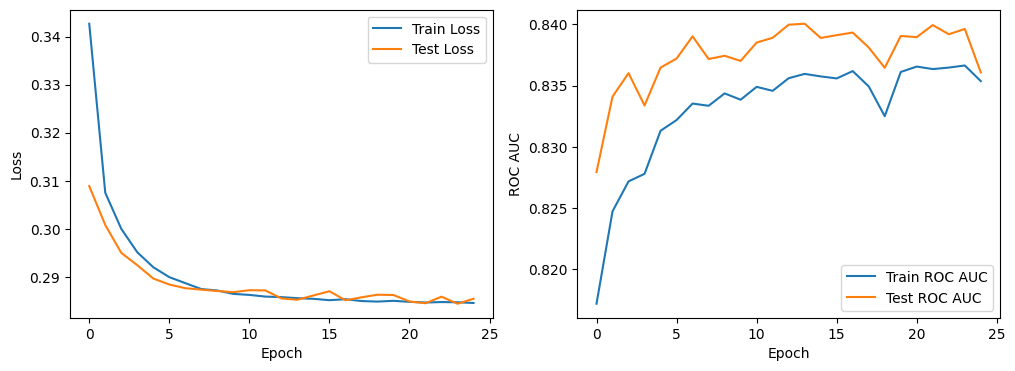

In [1]:
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader

train_data = pd.read_csv('loan_train.csv')
test_data = pd.read_csv('loan_test.csv')

categorical_cols = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

    label_encoders[col] = le

#Датасет
class LoanDataset(Dataset):
    def __init__(self, data, categorical_cols, target_col):
        self.data = data
        self.categorical_cols = categorical_cols
        self.target_col = target_col

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        categorical_values = [torch.tensor(self.data[col].iloc[idx], dtype=torch.long) for col in self.categorical_cols]
        target = torch.tensor(self.data[self.target_col].iloc[idx], dtype=torch.float32)
        return (*categorical_values, target)

train_dataset = LoanDataset(train_data, categorical_cols, 'loan_status')
test_dataset = LoanDataset(test_data, categorical_cols, 'loan_status')

#Даталоудеры
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Добавлены embedding-слои для всех категориальных признаков
class Model1(nn.Module):
    def __init__(self, num_pho, num_li, num_lg, num_cb, embedding_dim=8, hidden_size=32):
        super(Model1, self).__init__()
        self.embed_pho = nn.Embedding(num_pho, embedding_dim)
        self.embed_li = nn.Embedding(num_li, embedding_dim)
        self.embed_lg = nn.Embedding(num_lg, embedding_dim)
        self.embed_cb = nn.Embedding(num_cb, embedding_dim)

        total_emb_dim = len(categorical_cols) * embedding_dim
        self.block1 = nn.Linear(total_emb_dim, hidden_size)
        self.block2 = nn.Sequential(
            nn.Linear(hidden_size, hidden_size * 4),
            nn.ReLU(),
            nn.Linear(hidden_size * 4, hidden_size)
        )
        self.output = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, person_home_ownership, loan_intent, loan_grade, cb_per):
        embed_pho = self.embed_pho(person_home_ownership)
        embed_li = self.embed_li(loan_intent)
        embed_lg = self.embed_lg(loan_grade)
        embed_cb = self.embed_cb(cb_per)
        x = torch.cat([embed_pho, embed_li, embed_lg, embed_cb], dim=1)
        x = self.block1(x)
        x = self.block2(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

num_unique_values = {}
for col in categorical_cols:
    num_unique_values[col] = train_data[col].nunique()

model = Model1(
    num_pho = num_unique_values['person_home_ownership'],
    num_li = num_unique_values['loan_intent'],
    num_lg = num_unique_values['loan_grade'],
    num_cb = num_unique_values['cb_person_default_on_file']
)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 25

train_losses = []
test_losses = []
train_roc_aucs = []
test_roc_aucs = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_losses = []

    for batch in train_loader:
        *categorical_values, target = batch
        outputs = model(*categorical_values)

        loss = criterion(outputs, target.reshape(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_losses.append(loss.item())

    train_loss = np.mean(epoch_train_losses)
    train_losses.append(train_loss)

    model.eval()
    with torch.no_grad():
        all_test_outputs = []
        all_test_labels = []
        test_loss = 0.0
        num_batches = 0

        for batch in test_loader:
            *categorical_values, target = batch
            outputs = model(*categorical_values)
            test_loss += criterion(outputs, target.reshape(-1, 1)).item()
            all_test_outputs.append(outputs.cpu().numpy())
            all_test_labels.append(target.cpu().numpy())
            num_batches += 1

        test_loss /= num_batches
        test_losses.append(test_loss)

        all_test_outputs = np.concatenate(all_test_outputs)
        all_test_labels = np.concatenate(all_test_labels)
        test_roc_auc = roc_auc_score(all_test_labels, all_test_outputs)
        test_roc_aucs.append(test_roc_auc)

        all_train_outputs = []
        all_train_labels = []
        for batch in train_loader:
            *categorical_values, target = batch
            outputs = model(*categorical_values)
            all_train_outputs.append(outputs.cpu().numpy())
            all_train_labels.append(target.cpu().numpy())

        all_train_outputs = np.concatenate(all_train_outputs)
        all_train_labels = np.concatenate(all_train_labels)
        train_roc_auc = roc_auc_score(all_train_labels, all_train_outputs)
        train_roc_aucs.append(train_roc_auc)


    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, '
          f'Train ROC AUC: {train_roc_auc:.4f}, Test ROC AUC: {test_roc_auc:.4f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_roc_aucs, label='Train ROC AUC')
plt.plot(test_roc_aucs, label='Test ROC AUC')
plt.xlabel('Epoch')
plt.ylabel('ROC AUC')
plt.legend()

plt.show()

# ***Задание №1***

In [ ]:
# Model №1
class SimpleModel1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleModel1, self).__init__()
        # 1. Все входные данные в hidden_size
        self.linear1 = nn.Linear(input_size, hidden_size)

        # 2. Простой блок
        self.linear2 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu = nn.ReLU()
        self.linear3 = nn.Linear(hidden_size * 4, hidden_size)

        # 3. Linear (hidden size в выход)
        self.output = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [ ]:
input_size = X_train.shape[1]
hidden_size = 32
model = SimpleModel1(input_size, hidden_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
train_roc_aucs = []  # Список для хранения значений ROC AUC на train
valid_roc_aucs = []  # Список для хранения значений ROC AUC на validation

In [ ]:
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)

        train_predictions = (outputs >= 0.5).float()
        valid_predictions = (valid_outputs >= 0.5).float()
        train_accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.size(0)).item()
        valid_accuracy = (valid_predictions.eq(y_valid_tensor).sum() / y_valid_tensor.size(0)).item()
        train_roc_auc = roc_auc_score(y_train_tensor.cpu().numpy(), outputs.cpu().numpy())  # Переводим данные на CPU и в NumPy
        valid_roc_auc = roc_auc_score(y_valid_tensor.cpu().numpy(), valid_outputs.cpu().numpy()) # Переводим данные на CPU и в NumPy

    # Потери и точность(аккуратность)
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    train_roc_aucs.append(train_roc_auc)
    valid_roc_aucs.append(valid_roc_auc)

    # Вывод обучения
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}, '
          f'Train ROC AUC: {train_roc_auc:.4f}, Valid ROC AUC: {valid_roc_auc:.4f}')

Epoch [1/100], Train Loss: 0.7034, Valid Loss: 0.6999, Train Accuracy: 0.3928, Valid Accuracy: 0.4278, Train ROC AUC: 0.5151, Valid ROC AUC: 0.5152
Epoch [2/100], Train Loss: 0.6999, Valid Loss: 0.6964, Train Accuracy: 0.4278, Valid Accuracy: 0.4656, Train ROC AUC: 0.5152, Valid ROC AUC: 0.5154
Epoch [3/100], Train Loss: 0.6964, Valid Loss: 0.6929, Train Accuracy: 0.4656, Valid Accuracy: 0.5023, Train ROC AUC: 0.5154, Valid ROC AUC: 0.5156
Epoch [4/100], Train Loss: 0.6929, Valid Loss: 0.6895, Train Accuracy: 0.5023, Valid Accuracy: 0.5387, Train ROC AUC: 0.5156, Valid ROC AUC: 0.5159
Epoch [5/100], Train Loss: 0.6895, Valid Loss: 0.6861, Train Accuracy: 0.5387, Valid Accuracy: 0.5782, Train ROC AUC: 0.5159, Valid ROC AUC: 0.5163
Epoch [6/100], Train Loss: 0.6861, Valid Loss: 0.6828, Train Accuracy: 0.5782, Valid Accuracy: 0.6153, Train ROC AUC: 0.5163, Valid ROC AUC: 0.5168
Epoch [7/100], Train Loss: 0.6828, Valid Loss: 0.6795, Train Accuracy: 0.6153, Valid Accuracy: 0.6554, Train ROC

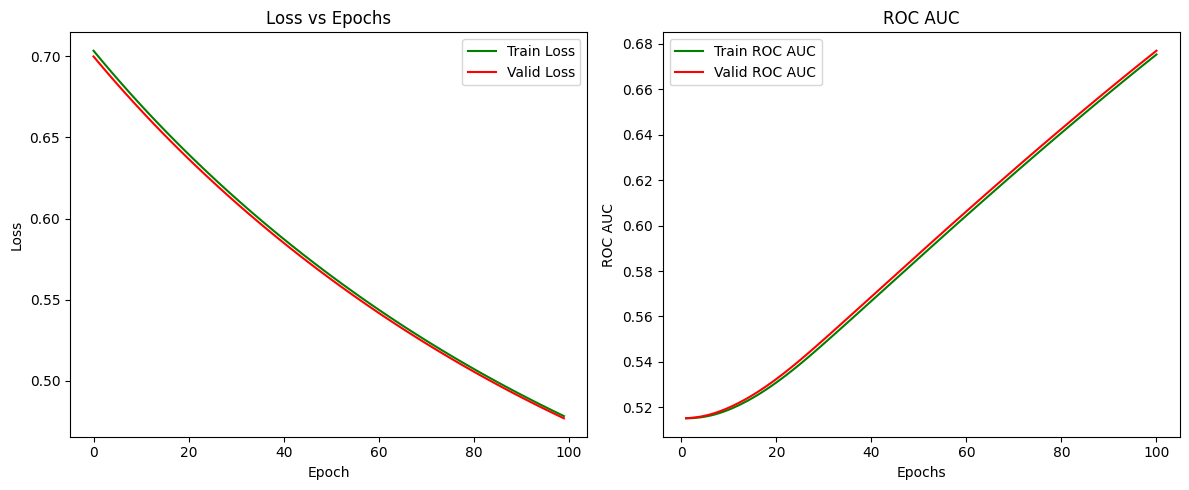

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(1, num_epochs + 1)

# Потери
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss',color="green")
plt.plot(valid_losses, label='Valid Loss', color="red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# График ROC AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, train_roc_aucs, label='Train ROC AUC', color="green")
plt.plot(epochs, valid_roc_aucs, label='Valid ROC AUC', color="red")
plt.title('ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()

- Графики немного напоминают даже линейную функцию (разумеется, немного выгнутую)
- Решила учить 100 эпох. Возможно, это много, но Roc AUC немного подрастает.

--------------------------------------------------------------------------------

# ***Задание №2***

In [ ]:
# Теперь hidden_size = 128

# Model №2
class SimpleModel2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleModel2, self).__init__()

        # 1. Все входные данные в hidden_size
        self.linear1 = nn.Linear(input_size, hidden_size)

        # 2. Первый простой блок
        self.linear2 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu1 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_size * 4, hidden_size)

        # 3. Второй блок
        self.linear4 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu2 = nn.ReLU()
        self.linear5 = nn.Linear(hidden_size * 4, hidden_size)

        # 4. Третий блок
        self.linear6 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu3 = nn.ReLU()
        self.linear7 = nn.Linear(hidden_size * 4, hidden_size)

        # 5. Linear (hidden size в выход)
        self.output = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        # Первый простой блок
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        # Второй блок
        x = self.linear4(x)
        x = self.relu2(x)
        x = self.linear5(x)
        # Третий блок
        x = self.linear6(x)
        x = self.relu3(x)
        x = self.linear7(x)
        # Выход
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [ ]:
input_size = X_train.shape[1]
hidden_size = 128
model = SimpleModel2(input_size, hidden_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
train_roc_aucs = []  # Список для хранения значений ROC AUC на train
valid_roc_aucs = []  # Список для хранения значений ROC AUC на validation

In [ ]:
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)

        train_predictions = (outputs >= 0.5).float()
        valid_predictions = (valid_outputs >= 0.5).float()
        train_accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.size(0)).item()
        valid_accuracy = (valid_predictions.eq(y_valid_tensor).sum() / y_valid_tensor.size(0)).item()
        train_roc_auc = roc_auc_score(y_train_tensor.cpu().numpy(), outputs.cpu().numpy())  # Переводим данные на CPU и в NumPy
        valid_roc_auc = roc_auc_score(y_valid_tensor.cpu().numpy(), valid_outputs.cpu().numpy()) # Переводим данные на CPU и в NumPy

    # Потери и точность(аккуратность)
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    train_roc_aucs.append(train_roc_auc)
    valid_roc_aucs.append(valid_roc_auc)

    # Вывод обучения
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}, '
          f'Train ROC AUC: {train_roc_auc:.4f}, Valid ROC AUC: {valid_roc_auc:.4f}')

Epoch [1/100], Train Loss: 0.7021, Valid Loss: 0.6997, Train Accuracy: 0.1424, Valid Accuracy: 0.1424, Train ROC AUC: 0.5640, Valid ROC AUC: 0.5711
Epoch [2/100], Train Loss: 0.6997, Valid Loss: 0.6974, Train Accuracy: 0.1424, Valid Accuracy: 0.1424, Train ROC AUC: 0.5711, Valid ROC AUC: 0.5781
Epoch [3/100], Train Loss: 0.6974, Valid Loss: 0.6951, Train Accuracy: 0.1424, Valid Accuracy: 0.1438, Train ROC AUC: 0.5781, Valid ROC AUC: 0.5851
Epoch [4/100], Train Loss: 0.6951, Valid Loss: 0.6928, Train Accuracy: 0.1438, Valid Accuracy: 0.6419, Train ROC AUC: 0.5851, Valid ROC AUC: 0.5919
Epoch [5/100], Train Loss: 0.6928, Valid Loss: 0.6905, Train Accuracy: 0.6419, Valid Accuracy: 0.8534, Train ROC AUC: 0.5919, Valid ROC AUC: 0.5986
Epoch [6/100], Train Loss: 0.6905, Valid Loss: 0.6883, Train Accuracy: 0.8534, Valid Accuracy: 0.8576, Train ROC AUC: 0.5986, Valid ROC AUC: 0.6052
Epoch [7/100], Train Loss: 0.6883, Valid Loss: 0.6860, Train Accuracy: 0.8576, Valid Accuracy: 0.8576, Train ROC

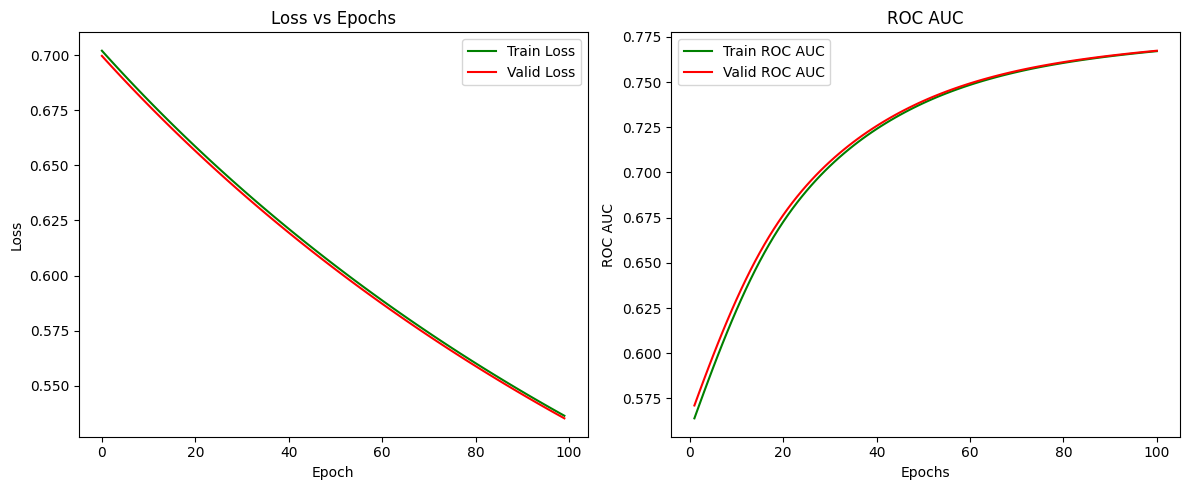

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(1, num_epochs + 1)

# Потери
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss',color="green")
plt.plot(valid_losses, label='Valid Loss', color="red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# График ROC AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, train_roc_aucs, label='Train ROC AUC', color="green")
plt.plot(epochs, valid_roc_aucs, label='Valid ROC AUC', color="red")
plt.title('ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()

- График Roc AUC заметно стал выпуклым
- По сравнению с предыдущим экспериментом заметны улучшения показателей Roc AUC на валиде и трейне, небольшое увеличение лосса (на обоих выборках).

--------------------------------------------------------------------------------

# ***Задание №3***

In [ ]:
# Теперь hidden_size = 128

# Model №3
class SimpleModel3(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleModel3, self).__init__()

        # 1. Все входные данные в hidden_size
        self.linear1 = nn.Linear(input_size, hidden_size)

        # 2. Первый простой блок
        self.bn1 = nn.BatchNorm1d(hidden_size) # Batch Norm 1
        self.linear2 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu1 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_size * 4, hidden_size)

        # 3. Второй блок
        self.bn2 = nn.BatchNorm1d(hidden_size) # Batch Norm 2
        self.linear4 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu2 = nn.ReLU()
        self.linear5 = nn.Linear(hidden_size * 4, hidden_size)

        # 4. Третий блок
        self.bn3 = nn.BatchNorm1d(hidden_size) # Batch Norm 3
        self.linear6 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu3 = nn.ReLU()
        self.linear7 = nn.Linear(hidden_size * 4, hidden_size)

        # 5. Linear (hidden size в выход)
        self.output = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)

        # Первый простой блок
        identity1 = x  # Skip connection 1
        x = self.bn1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.linear3(x)
        x = x + identity1 # Skip connection 1

        # Второй блок
        identity2 = x  # Skip connection 2
        x = self.bn2(x)
        x = self.linear4(x)
        x = self.relu2(x)
        x = self.linear5(x)
        x = x + identity2 # Skip connection 2

        # Третий блок
        identity3 = x  # Skip connection 3
        x = self.bn3(x)
        x = self.linear6(x)
        x = self.relu3(x)
        x = self.linear7(x)
        x = x + identity3 # Skip connection 3

        # Выход
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [ ]:
input_size = X_train.shape[1]
hidden_size = 128
model = SimpleModel3(input_size, hidden_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
train_roc_aucs = []  # Список для хранения значений ROC AUC на train
valid_roc_aucs = []  # Список для хранения значений ROC AUC на validation

In [ ]:
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)

        train_predictions = (outputs >= 0.5).float()
        valid_predictions = (valid_outputs >= 0.5).float()
        train_accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.size(0)).item()
        valid_accuracy = (valid_predictions.eq(y_valid_tensor).sum() / y_valid_tensor.size(0)).item()
        train_roc_auc = roc_auc_score(y_train_tensor.cpu().numpy(), outputs.cpu().numpy())  # Переводим данные на CPU и в NumPy
        valid_roc_auc = roc_auc_score(y_valid_tensor.cpu().numpy(), valid_outputs.cpu().numpy()) # Переводим данные на CPU и в NumPy

    # Потери и точность(аккуратность)
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    train_roc_aucs.append(train_roc_auc)
    valid_roc_aucs.append(valid_roc_auc)

    # Вывод обучения
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}, '
          f'Train ROC AUC: {train_roc_auc:.4f}, Valid ROC AUC: {valid_roc_auc:.4f}')

Epoch [1/100], Train Loss: 0.6631, Valid Loss: 0.6283, Train Accuracy: 0.6044, Valid Accuracy: 0.6814, Train ROC AUC: 0.4735, Valid ROC AUC: 0.4534
Epoch [2/100], Train Loss: 0.6280, Valid Loss: 0.6065, Train Accuracy: 0.6768, Valid Accuracy: 0.7204, Train ROC AUC: 0.4951, Valid ROC AUC: 0.4753
Epoch [3/100], Train Loss: 0.5980, Valid Loss: 0.5866, Train Accuracy: 0.7312, Valid Accuracy: 0.7555, Train ROC AUC: 0.5170, Valid ROC AUC: 0.4977
Epoch [4/100], Train Loss: 0.5722, Valid Loss: 0.5684, Train Accuracy: 0.7748, Valid Accuracy: 0.7866, Train ROC AUC: 0.5391, Valid ROC AUC: 0.5203
Epoch [5/100], Train Loss: 0.5497, Valid Loss: 0.5515, Train Accuracy: 0.8067, Valid Accuracy: 0.8112, Train ROC AUC: 0.5609, Valid ROC AUC: 0.5428
Epoch [6/100], Train Loss: 0.5301, Valid Loss: 0.5360, Train Accuracy: 0.8301, Valid Accuracy: 0.8298, Train ROC AUC: 0.5822, Valid ROC AUC: 0.5650
Epoch [7/100], Train Loss: 0.5128, Valid Loss: 0.5215, Train Accuracy: 0.8432, Valid Accuracy: 0.8413, Train ROC

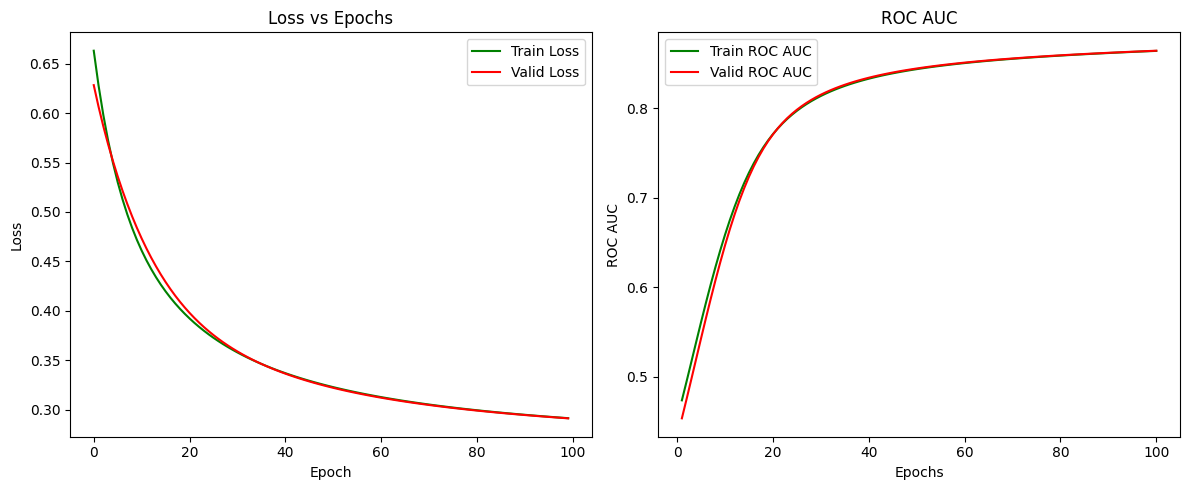

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(1, num_epochs + 1)

# Потери
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss',color="green")
plt.plot(valid_losses, label='Valid Loss', color="red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# График ROC AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, train_roc_aucs, label='Train ROC AUC', color="green")
plt.plot(epochs, valid_roc_aucs, label='Valid ROC AUC', color="red")
plt.title('ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()

- Всё сразу подросло.
-Лосс в итоге заметно уменьшился, точность немного выросла, Roc AUC увеличился (по сравнению с предыдущей задачей)

--------------------------------------------------------------------------------

# ***Задание №4***

In [ ]:
# Model №4
class SimpleModel4(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_p=0.0):
        super(SimpleModel4, self).__init__()
        self.dropout_p = dropout_p

        # 1. Все входные данные в hidden_size
        self.linear1 = nn.Linear(input_size, hidden_size)

        # 2. Первый простой блок
        self.bn1 = nn.BatchNorm1d(hidden_size) # Batch Norm 1
        self.linear2 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_p) # Dropout 1
        self.linear3 = nn.Linear(hidden_size * 4, hidden_size)

        # 3. Второй блок
        self.bn2 = nn.BatchNorm1d(hidden_size) # Batch Norm 2
        self.linear4 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_p) # Dropout 2
        self.linear5 = nn.Linear(hidden_size * 4, hidden_size)

        # 4. Третий блок
        self.bn3 = nn.BatchNorm1d(hidden_size) # Batch Norm 3
        self.linear6 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_p) # Dropout 3
        self.linear7 = nn.Linear(hidden_size * 4, hidden_size)

        # 5. Linear (hidden size в выход)
        self.output = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)

        # Первый простой блок
        identity1 = x  # Skip connection 1
        x = self.bn1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.dropout1(x) # Apply dropout 2
        x = self.linear3(x)
        x = x + identity1 # Skip connection 1

        # Второй блок
        identity2 = x  # Skip connection 2
        x = self.bn2(x)
        x = self.linear4(x)
        x = self.relu2(x)
        x = self.dropout2(x) # Apply dropout 2
        x = self.linear5(x)
        x = x + identity2 # Skip connection 2

        # Третий блок
        identity3 = x  # Skip connection 3
        x = self.bn3(x)
        x = self.linear6(x)
        x = self.relu3(x)
        x = self.dropout3(x) # Apply dropout 3
        x = self.linear7(x)
        x = x + identity3 # Skip connection 3

        # Выход
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [ ]:
# Possible Dropout values
DROPOUT_VALUES = [0.01, 0.1, 0.2, 0.5, 0.9]
input_size = X_train.shape[1]
hidden_size = 128
drop = 0.01
model = SimpleModel4(input_size, hidden_size, drop)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
train_roc_aucs = []  # Список для хранения значений ROC AUC на train
valid_roc_aucs = []  # Список для хранения значений ROC AUC на validation

In [ ]:
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)

        train_predictions = (outputs >= 0.5).float()
        valid_predictions = (valid_outputs >= 0.5).float()
        train_accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.size(0)).item()
        valid_accuracy = (valid_predictions.eq(y_valid_tensor).sum() / y_valid_tensor.size(0)).item()
        train_roc_auc = roc_auc_score(y_train_tensor.cpu().numpy(), outputs.cpu().numpy())  # Переводим данные на CPU и в NumPy
        valid_roc_auc = roc_auc_score(y_valid_tensor.cpu().numpy(), valid_outputs.cpu().numpy()) # Переводим данные на CPU и в NumPy

    # Потери и точность(аккуратность)
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    train_roc_aucs.append(train_roc_auc)
    valid_roc_aucs.append(valid_roc_auc)

    # Вывод обучения
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}, '
          f'Train ROC AUC: {train_roc_auc:.4f}, Valid ROC AUC: {valid_roc_auc:.4f}')

Epoch [1/100], Train Loss: 0.8033, Valid Loss: 0.7479, Train Accuracy: 0.3513, Valid Accuracy: 0.4095, Train ROC AUC: 0.2795, Valid ROC AUC: 0.3354
Epoch [2/100], Train Loss: 0.7467, Valid Loss: 0.7121, Train Accuracy: 0.4392, Valid Accuracy: 0.4892, Train ROC AUC: 0.3050, Valid ROC AUC: 0.3667
Epoch [3/100], Train Loss: 0.6988, Valid Loss: 0.6798, Train Accuracy: 0.5355, Valid Accuracy: 0.5723, Train ROC AUC: 0.3359, Valid ROC AUC: 0.4021
Epoch [4/100], Train Loss: 0.6581, Valid Loss: 0.6505, Train Accuracy: 0.6276, Valid Accuracy: 0.6426, Train ROC AUC: 0.3715, Valid ROC AUC: 0.4402
Epoch [5/100], Train Loss: 0.6232, Valid Loss: 0.6239, Train Accuracy: 0.7006, Valid Accuracy: 0.7035, Train ROC AUC: 0.4105, Valid ROC AUC: 0.4796
Epoch [6/100], Train Loss: 0.5929, Valid Loss: 0.5997, Train Accuracy: 0.7603, Valid Accuracy: 0.7542, Train ROC AUC: 0.4525, Valid ROC AUC: 0.5188
Epoch [7/100], Train Loss: 0.5666, Valid Loss: 0.5775, Train Accuracy: 0.8013, Valid Accuracy: 0.7930, Train ROC

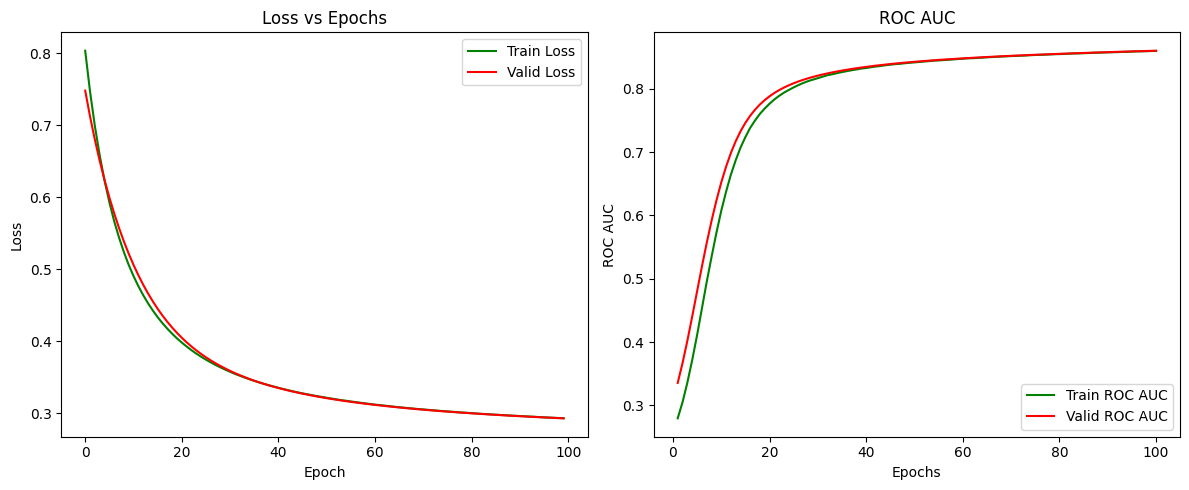

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(1, num_epochs + 1)

# Потери
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss',color="green")
plt.plot(valid_losses, label='Valid Loss', color="red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# График ROC AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, train_roc_aucs, label='Train ROC AUC', color="green")
plt.plot(epochs, valid_roc_aucs, label='Valid ROC AUC', color="red")
plt.title('ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()

- Результаты немного лучше, нежели без дропаута

---------------------------------------------------------------------------

In [ ]:
input_size = X_train.shape[1]
hidden_size = 128
drop = 0.1
model = SimpleModel4(input_size, hidden_size, drop)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
train_roc_aucs = []  # Список для хранения значений ROC AUC на train
valid_roc_aucs = []  # Список для хранения значений ROC AUC на validation

In [ ]:
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)

        train_predictions = (outputs >= 0.5).float()
        valid_predictions = (valid_outputs >= 0.5).float()
        train_accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.size(0)).item()
        valid_accuracy = (valid_predictions.eq(y_valid_tensor).sum() / y_valid_tensor.size(0)).item()
        train_roc_auc = roc_auc_score(y_train_tensor.cpu().numpy(), outputs.cpu().numpy())  # Переводим данные на CPU и в NumPy
        valid_roc_auc = roc_auc_score(y_valid_tensor.cpu().numpy(), valid_outputs.cpu().numpy()) # Переводим данные на CPU и в NumPy

    # Потери и точность(аккуратность)
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    train_roc_aucs.append(train_roc_auc)
    valid_roc_aucs.append(valid_roc_auc)

    # Вывод обучения
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}, '
          f'Train ROC AUC: {train_roc_auc:.4f}, Valid ROC AUC: {valid_roc_auc:.4f}')

Epoch [1/100], Train Loss: 0.7728, Valid Loss: 0.6972, Train Accuracy: 0.2927, Valid Accuracy: 0.4929, Train ROC AUC: 0.4683, Valid ROC AUC: 0.4453
Epoch [2/100], Train Loss: 0.7068, Valid Loss: 0.6598, Train Accuracy: 0.4635, Valid Accuracy: 0.6510, Train ROC AUC: 0.4924, Valid ROC AUC: 0.4687
Epoch [3/100], Train Loss: 0.6542, Valid Loss: 0.6274, Train Accuracy: 0.6374, Valid Accuracy: 0.7605, Train ROC AUC: 0.5152, Valid ROC AUC: 0.4936
Epoch [4/100], Train Loss: 0.6110, Valid Loss: 0.5993, Train Accuracy: 0.7567, Valid Accuracy: 0.8185, Train ROC AUC: 0.5415, Valid ROC AUC: 0.5195
Epoch [5/100], Train Loss: 0.5764, Valid Loss: 0.5745, Train Accuracy: 0.8207, Valid Accuracy: 0.8496, Train ROC AUC: 0.5633, Valid ROC AUC: 0.5461
Epoch [6/100], Train Loss: 0.5473, Valid Loss: 0.5525, Train Accuracy: 0.8485, Valid Accuracy: 0.8635, Train ROC AUC: 0.5876, Valid ROC AUC: 0.5728
Epoch [7/100], Train Loss: 0.5228, Valid Loss: 0.5329, Train Accuracy: 0.8611, Valid Accuracy: 0.8672, Train ROC

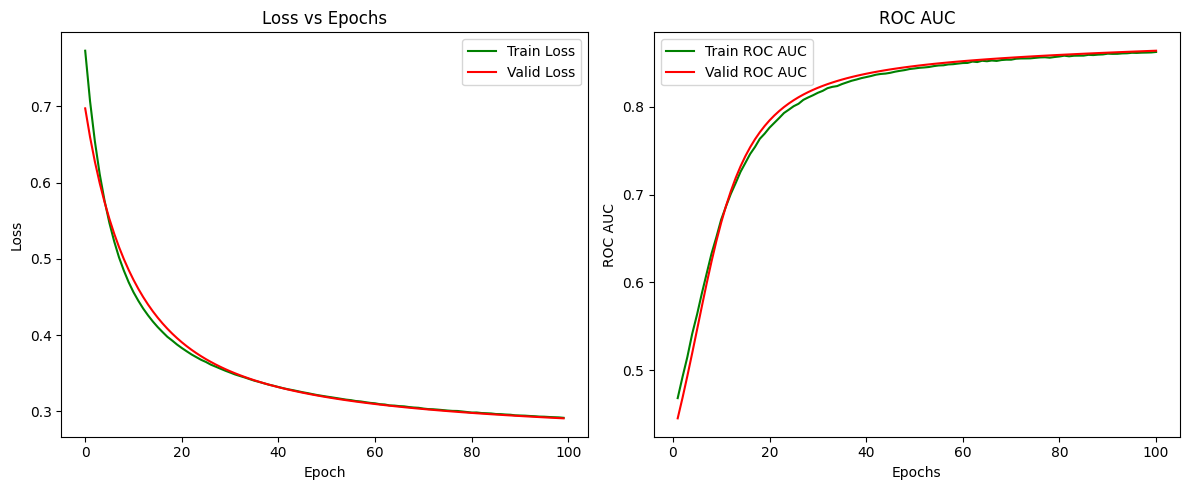

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(1, num_epochs + 1)

# Потери
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss',color="green")
plt.plot(valid_losses, label='Valid Loss', color="red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# График ROC AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, train_roc_aucs, label='Train ROC AUC', color="green")
plt.plot(epochs, valid_roc_aucs, label='Valid ROC AUC', color="red")
plt.title('ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()

- Roc AUC немного увеличивается, как и точность.

---------------------------------------------------------------------------

In [ ]:
input_size = X_train.shape[1]
hidden_size = 128
drop = 0.2
model = SimpleModel4(input_size, hidden_size, drop)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
train_roc_aucs = []  # Список для хранения значений ROC AUC на train
valid_roc_aucs = []  # Список для хранения значений ROC AUC на validation

In [ ]:
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)

        train_predictions = (outputs >= 0.5).float()
        valid_predictions = (valid_outputs >= 0.5).float()
        train_accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.size(0)).item()
        valid_accuracy = (valid_predictions.eq(y_valid_tensor).sum() / y_valid_tensor.size(0)).item()
        train_roc_auc = roc_auc_score(y_train_tensor.cpu().numpy(), outputs.cpu().numpy())  # Переводим данные на CPU и в NumPy
        valid_roc_auc = roc_auc_score(y_valid_tensor.cpu().numpy(), valid_outputs.cpu().numpy()) # Переводим данные на CPU и в NumPy

    # Потери и точность(аккуратность)
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    train_roc_aucs.append(train_roc_auc)
    valid_roc_aucs.append(valid_roc_auc)

    # Вывод обучения
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}, '
          f'Train ROC AUC: {train_roc_auc:.4f}, Valid ROC AUC: {valid_roc_auc:.4f}')

Epoch [1/100], Train Loss: 0.5799, Valid Loss: 0.5761, Train Accuracy: 0.8003, Valid Accuracy: 0.8124, Train ROC AUC: 0.6707, Valid ROC AUC: 0.6866
Epoch [2/100], Train Loss: 0.5506, Valid Loss: 0.5549, Train Accuracy: 0.8285, Valid Accuracy: 0.8317, Train ROC AUC: 0.6871, Valid ROC AUC: 0.7014
Epoch [3/100], Train Loss: 0.5261, Valid Loss: 0.5358, Train Accuracy: 0.8431, Valid Accuracy: 0.8432, Train ROC AUC: 0.7002, Valid ROC AUC: 0.7145
Epoch [4/100], Train Loss: 0.5050, Valid Loss: 0.5186, Train Accuracy: 0.8514, Valid Accuracy: 0.8501, Train ROC AUC: 0.7137, Valid ROC AUC: 0.7262
Epoch [5/100], Train Loss: 0.4867, Valid Loss: 0.5029, Train Accuracy: 0.8563, Valid Accuracy: 0.8548, Train ROC AUC: 0.7265, Valid ROC AUC: 0.7366
Epoch [6/100], Train Loss: 0.4715, Valid Loss: 0.4887, Train Accuracy: 0.8572, Valid Accuracy: 0.8572, Train ROC AUC: 0.7354, Valid ROC AUC: 0.7460
Epoch [7/100], Train Loss: 0.4578, Valid Loss: 0.4757, Train Accuracy: 0.8599, Valid Accuracy: 0.8590, Train ROC

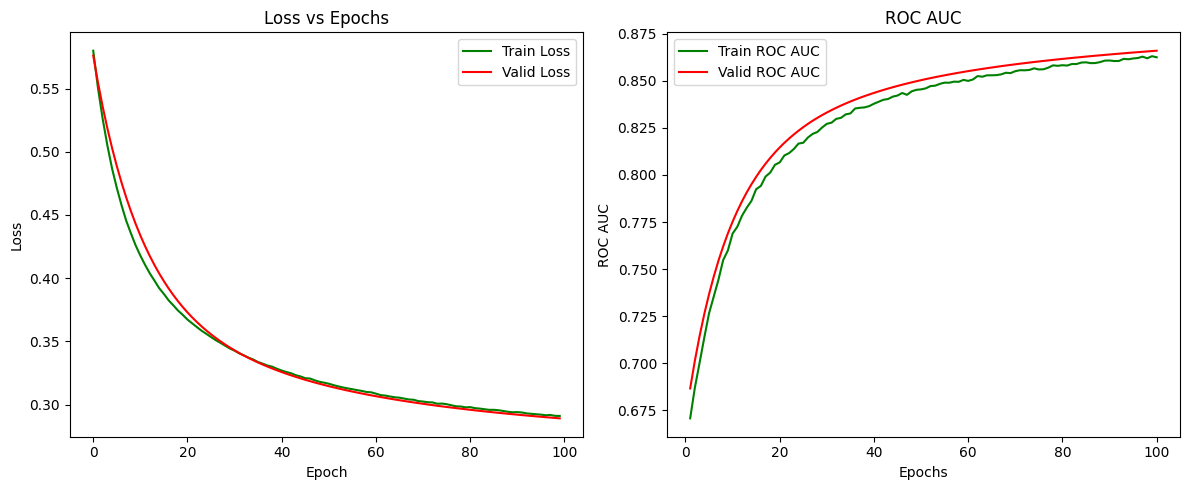

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(1, num_epochs + 1)

# Потери
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss',color="green")
plt.plot(valid_losses, label='Valid Loss', color="red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# График ROC AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, train_roc_aucs, label='Train ROC AUC', color="green")
plt.plot(epochs, valid_roc_aucs, label='Valid ROC AUC', color="red")
plt.title('ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()

- Roc AUC на валиде начинает превосходить трейн и сам он немного увеличился по сравнению с дропаутом в 0.1

- Именно это значение дропаута решаю зафиксировать, как оптимальное.

---------------------------------------------------------------------------

In [ ]:
input_size = X_train.shape[1]
hidden_size = 128
drop = 0.5
model = SimpleModel4(input_size, hidden_size, drop)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
train_roc_aucs = []  # Список для хранения значений ROC AUC на train
valid_roc_aucs = []  # Список для хранения значений ROC AUC на validation

In [ ]:
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)

        train_predictions = (outputs >= 0.5).float()
        valid_predictions = (valid_outputs >= 0.5).float()
        train_accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.size(0)).item()
        valid_accuracy = (valid_predictions.eq(y_valid_tensor).sum() / y_valid_tensor.size(0)).item()
        train_roc_auc = roc_auc_score(y_train_tensor.cpu().numpy(), outputs.cpu().numpy())  # Переводим данные на CPU и в NumPy
        valid_roc_auc = roc_auc_score(y_valid_tensor.cpu().numpy(), valid_outputs.cpu().numpy()) # Переводим данные на CPU и в NumPy

    # Потери и точность(аккуратность)
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    train_roc_aucs.append(train_roc_auc)
    valid_roc_aucs.append(valid_roc_auc)

    # Вывод обучения
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}, '
          f'Train ROC AUC: {train_roc_auc:.4f}, Valid ROC AUC: {valid_roc_auc:.4f}')

Epoch [1/100], Train Loss: 0.6671, Valid Loss: 0.6407, Train Accuracy: 0.6130, Valid Accuracy: 0.7096, Train ROC AUC: 0.3837, Valid ROC AUC: 0.4759
Epoch [2/100], Train Loss: 0.6307, Valid Loss: 0.6157, Train Accuracy: 0.7053, Valid Accuracy: 0.7691, Train ROC AUC: 0.4018, Valid ROC AUC: 0.5071
Epoch [3/100], Train Loss: 0.5985, Valid Loss: 0.5932, Train Accuracy: 0.7716, Valid Accuracy: 0.8072, Train ROC AUC: 0.4305, Valid ROC AUC: 0.5379
Epoch [4/100], Train Loss: 0.5715, Valid Loss: 0.5728, Train Accuracy: 0.8097, Valid Accuracy: 0.8302, Train ROC AUC: 0.4607, Valid ROC AUC: 0.5675
Epoch [5/100], Train Loss: 0.5480, Valid Loss: 0.5543, Train Accuracy: 0.8321, Valid Accuracy: 0.8427, Train ROC AUC: 0.4860, Valid ROC AUC: 0.5953
Epoch [6/100], Train Loss: 0.5281, Valid Loss: 0.5374, Train Accuracy: 0.8447, Valid Accuracy: 0.8507, Train ROC AUC: 0.5136, Valid ROC AUC: 0.6205
Epoch [7/100], Train Loss: 0.5110, Valid Loss: 0.5219, Train Accuracy: 0.8503, Valid Accuracy: 0.8549, Train ROC

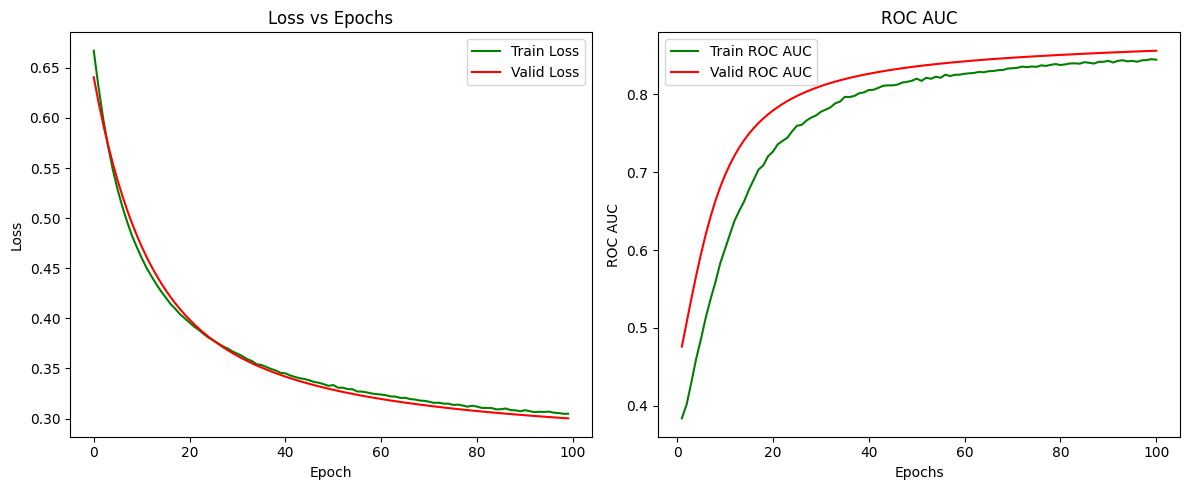

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(1, num_epochs + 1)

# Потери
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss',color="green")
plt.plot(valid_losses, label='Valid Loss', color="red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# График ROC AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, train_roc_aucs, label='Train ROC AUC', color="green")
plt.plot(epochs, valid_roc_aucs, label='Valid ROC AUC', color="red")
plt.title('ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()

- Уже становится очевидно, что Roc AUC на валиде достаточно превосходит трейн

---------------------------------------------------------------------------

In [ ]:
input_size = X_train.shape[1]
hidden_size = 128
drop = 0.9
model = SimpleModel4(input_size, hidden_size, drop)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
train_roc_aucs = []  # Список для хранения значений ROC AUC на train
valid_roc_aucs = []  # Список для хранения значений ROC AUC на validation

In [ ]:
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        valid_outputs = model(X_valid_tensor)
        valid_loss = criterion(valid_outputs, y_valid_tensor)

        train_predictions = (outputs >= 0.5).float()
        valid_predictions = (valid_outputs >= 0.5).float()
        train_accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.size(0)).item()
        valid_accuracy = (valid_predictions.eq(y_valid_tensor).sum() / y_valid_tensor.size(0)).item()
        train_roc_auc = roc_auc_score(y_train_tensor.cpu().numpy(), outputs.cpu().numpy())  # Переводим данные на CPU и в NumPy
        valid_roc_auc = roc_auc_score(y_valid_tensor.cpu().numpy(), valid_outputs.cpu().numpy()) # Переводим данные на CPU и в NumPy

    # Потери и точность(аккуратность)
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    train_roc_aucs.append(train_roc_auc)
    valid_roc_aucs.append(valid_roc_auc)

    # Вывод обучения
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}, '
          f'Train ROC AUC: {train_roc_auc:.4f}, Valid ROC AUC: {valid_roc_auc:.4f}')

Epoch [1/100], Train Loss: 0.7475, Valid Loss: 0.6754, Train Accuracy: 0.4961, Valid Accuracy: 0.5786, Train ROC AUC: 0.5072, Valid ROC AUC: 0.5429
Epoch [2/100], Train Loss: 0.7077, Valid Loss: 0.6502, Train Accuracy: 0.5526, Valid Accuracy: 0.6758, Train ROC AUC: 0.5235, Valid ROC AUC: 0.5632
Epoch [3/100], Train Loss: 0.6772, Valid Loss: 0.6278, Train Accuracy: 0.5928, Valid Accuracy: 0.7460, Train ROC AUC: 0.5182, Valid ROC AUC: 0.5832
Epoch [4/100], Train Loss: 0.6471, Valid Loss: 0.6078, Train Accuracy: 0.6374, Valid Accuracy: 0.7963, Train ROC AUC: 0.5318, Valid ROC AUC: 0.6026
Epoch [5/100], Train Loss: 0.6234, Valid Loss: 0.5897, Train Accuracy: 0.6738, Valid Accuracy: 0.8298, Train ROC AUC: 0.5312, Valid ROC AUC: 0.6214
Epoch [6/100], Train Loss: 0.6003, Valid Loss: 0.5733, Train Accuracy: 0.7080, Valid Accuracy: 0.8512, Train ROC AUC: 0.5416, Valid ROC AUC: 0.6386
Epoch [7/100], Train Loss: 0.5831, Valid Loss: 0.5582, Train Accuracy: 0.7295, Valid Accuracy: 0.8620, Train ROC

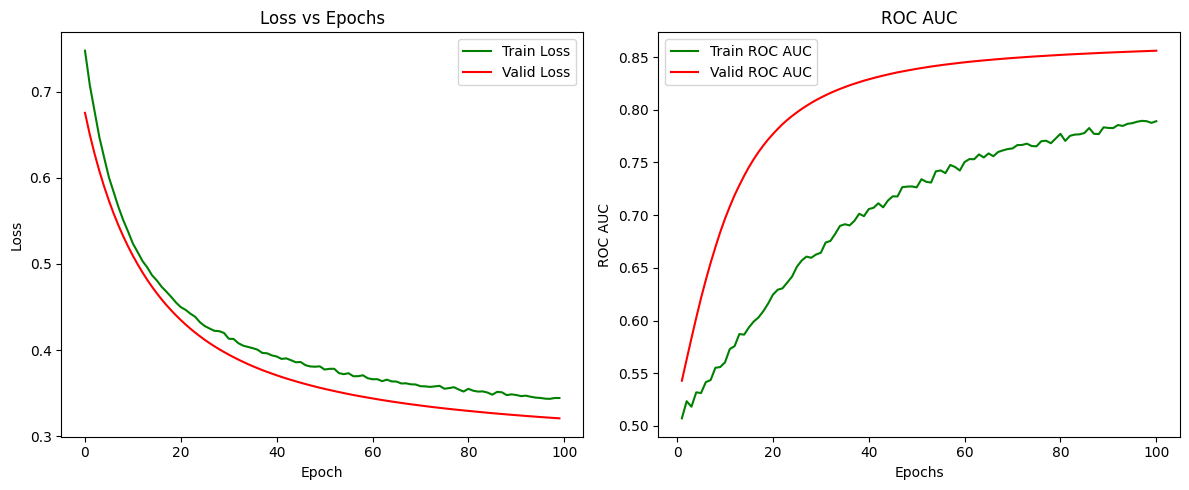

In [ ]:
plt.figure(figsize=(12, 5))
epochs = range(1, num_epochs + 1)

# Потери
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss',color="green")
plt.plot(valid_losses, label='Valid Loss', color="red")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# График ROC AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, train_roc_aucs, label='Train ROC AUC', color="green")
plt.plot(epochs, valid_roc_aucs, label='Valid ROC AUC', color="red")
plt.title('ROC AUC')
plt.xlabel('Epochs')
plt.ylabel('ROC AUC')
plt.legend()

plt.tight_layout()
plt.show()

- Лосс на валиде в любую эпоху заметно меньше лосса на трейне

- Roc AUC на валиде намного больше, чем на трейне


0.2 - dropout оптимальный

--------------------------------------------------------------------------------

# ***Задание №5***

In [ ]:
# Model №4
class SimpleModel4(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_p=0.0):
        super(SimpleModel4, self).__init__()
        self.dropout_p = dropout_p

        # 1. Все входные данные в hidden_size
        self.linear1 = nn.Linear(input_size, hidden_size)

        # 2. Первый простой блок
        self.bn1 = nn.BatchNorm1d(hidden_size) # Batch Norm 1
        self.linear2 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_p) # Dropout 1
        self.linear3 = nn.Linear(hidden_size * 4, hidden_size)

        # 3. Второй блок
        self.bn2 = nn.BatchNorm1d(hidden_size) # Batch Norm 2
        self.linear4 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_p) # Dropout 2
        self.linear5 = nn.Linear(hidden_size * 4, hidden_size)

        # 4. Третий блок
        self.bn3 = nn.BatchNorm1d(hidden_size) # Batch Norm 3
        self.linear6 = nn.Linear(hidden_size, hidden_size * 4)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_p) # Dropout 3
        self.linear7 = nn.Linear(hidden_size * 4, hidden_size)

        # 5. Linear (hidden size в выход)
        self.output = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)

        # Первый простой блок
        identity1 = x  # Skip connection 1
        x = self.bn1(x)
        x = self.linear2(x)
        x = self.relu1(x)
        x = self.dropout1(x) # Apply dropout 2
        x = self.linear3(x)
        x = x + identity1 # Skip connection 1

        # Второй блок
        identity2 = x  # Skip connection 2
        x = self.bn2(x)
        x = self.linear4(x)
        x = self.relu2(x)
        x = self.dropout2(x) # Apply dropout 2
        x = self.linear5(x)
        x = x + identity2 # Skip connection 2

        # Третий блок
        identity3 = x  # Skip connection 3
        x = self.bn3(x)
        x = self.linear6(x)
        x = self.relu3(x)
        x = self.dropout3(x) # Apply dropout 3
        x = self.linear7(x)
        x = x + identity3 # Skip connection 3

        # Выход
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [ ]:
def train_and_evaluate(model, X_train_tensor, y_train_tensor, X_valid_tensor, y_valid_tensor, learning_rate, weight_decay, num_epochs):

    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    train_roc_aucs = []
    valid_roc_aucs = []

    for epoch in range(num_epochs):
        model.train()

        outputs = model(X_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            valid_outputs = model(X_valid_tensor)
            valid_loss = criterion(valid_outputs, y_valid_tensor)

            train_predictions = (outputs >= 0.5).float()
            valid_predictions = (valid_outputs >= 0.5).float()
            train_accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.size(0)).item()
            valid_accuracy = (valid_predictions.eq(y_valid_tensor).sum() / y_valid_tensor.size(0)).item()
            train_roc_auc = roc_auc_score(y_train_tensor.cpu().numpy(), outputs.cpu().numpy())
            valid_roc_auc = roc_auc_score(y_valid_tensor.cpu().numpy(), valid_outputs.cpu().numpy())

        train_losses.append(train_loss.item())
        valid_losses.append(valid_loss.item())
        train_accuracies.append(train_accuracy)
        valid_accuracies.append(valid_accuracy)
        train_roc_aucs.append(train_roc_auc)
        valid_roc_aucs.append(valid_roc_auc)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Valid Loss: {valid_loss.item():.4f}, '
              f'Train Accuracy: {train_accuracy:.4f}, Valid Accuracy: {valid_accuracy:.4f}, '
              f'Train ROC AUC: {train_roc_auc:.4f}, Valid ROC AUC: {valid_roc_auc:.4f}')

    return valid_roc_aucs[-1]

In [ ]:
weight_decay_values = [0.1, 0.01, 0.001]
learning_rate_values = [0.01, 0.05, 0.1]
num_epochs = 100
drop = 0.2

best_valid_roc_auc = 0.0
best_params = None
input_size = X_train.shape[1]

for weight_decay in weight_decay_values:
    for learning_rate in learning_rate_values:

        print(f"\nTraining with weight_decay={weight_decay}, learning_rate={learning_rate}")
        model = SimpleModel4(input_size, hidden_size=128, dropout_p=drop)
        valid_roc_auc = train_and_evaluate(model, X_train_tensor, y_train_tensor, X_valid_tensor, y_valid_tensor, learning_rate, weight_decay, num_epochs)
        print(f"Final Validation ROC AUC: {valid_roc_auc:.4f}")

        if valid_roc_auc > best_valid_roc_auc:
            best_valid_roc_auc = valid_roc_auc
            best_params = {'weight_decay': weight_decay, 'learning_rate': learning_rate}

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Validation ROC AUC: {best_valid_roc_auc:.4f}")


Training with weight_decay=0.1, learning_rate=0.01
Epoch [1/100], Train Loss: 0.8041, Valid Loss: 0.7480, Train Accuracy: 0.3536, Valid Accuracy: 0.4090, Train ROC AUC: 0.2895, Valid ROC AUC: 0.3350
Epoch [2/100], Train Loss: 0.7479, Valid Loss: 0.7125, Train Accuracy: 0.4390, Valid Accuracy: 0.4876, Train ROC AUC: 0.3137, Valid ROC AUC: 0.3657
Epoch [3/100], Train Loss: 0.7008, Valid Loss: 0.6808, Train Accuracy: 0.5286, Valid Accuracy: 0.5695, Train ROC AUC: 0.3410, Valid ROC AUC: 0.4003
Epoch [4/100], Train Loss: 0.6609, Valid Loss: 0.6523, Train Accuracy: 0.6201, Valid Accuracy: 0.6389, Train ROC AUC: 0.3763, Valid ROC AUC: 0.4376
Epoch [5/100], Train Loss: 0.6266, Valid Loss: 0.6265, Train Accuracy: 0.6926, Valid Accuracy: 0.6995, Train ROC AUC: 0.4137, Valid ROC AUC: 0.4762
Epoch [6/100], Train Loss: 0.5976, Valid Loss: 0.6031, Train Accuracy: 0.7507, Valid Accuracy: 0.7499, Train ROC AUC: 0.4490, Valid ROC AUC: 0.5146
Epoch [7/100], Train Loss: 0.5716, Valid Loss: 0.5818, Train

- Если выбирать самую оптимальную пару значений по показателю Roc AUC на валидационной выборке, то получим weight_decay = 0.001 и learning_rate = 0.1 - именно на них и достигается точность в 0.91 на трейне и 0.92 на валидационной.